In [1]:
import pandas as pd
import glob
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# get the data in a format suitable for sns plot
def GetMedianAmplitude(Exp):
    am_list = glob.glob('../dataFolder/AmplitudeAnalysis/v1/' + Exp + '/fly*_AmpDataCompiled.csv')
    
    name = []
    bodypart = []
    median_amplitude = []
    winglength = []

    for f in am_list:
        df = pd.read_csv(f)
        if Exp == 'haltere_loading':
            variable = 'treatment'
        else:
            variable = 'winglength'
            
        for wl, sub_df in df.groupby(variable):
            for bd, specific_df in sub_df.groupby('body'):
                m = np.median(specific_df.amplitude)

                name.append(specific_df.flyID.unique()[0])
                bodypart.append(bd)
                median_amplitude.append(m)
                winglength.append(wl)

    new_df = pd.DataFrame({'flyID': name,
                          'body': bodypart,
                          'med_amplitude': median_amplitude,
                           'winglength': winglength
                          })
    return(new_df)

In [8]:
def getdelAmplitudeEachWing(median_Data):
    # plot the delta change of each wing from intact to different lengths
    
    # read in the guide to figure out which was the clipped wing
    guide = pd.read_table('../dataFolder/AmplitudeAnalysis/v1/' + Exp + '/Readme_leftRightWingClipped.txt')
    # guide.head()

    flyID = []
    deltaAmplitude = []
    treatment = []
    winglength = []

    for name, sub_df in median_Data.groupby('flyID'):
        clippedWing = guide.loc[guide.name == name, 'clippedWing'].values[0]

        for wl, specific in sub_df.groupby('winglength'):
            for bodypart, phew in specific.groupby('body'):
                ref = sub_df.loc[(sub_df.winglength == 1) & (sub_df.body == bodypart),
                                'med_amplitude'].values
                current = phew['med_amplitude'].values

                delta = current[0] - ref[0]

                if bodypart == clippedWing:
                    wingTreatment = 'clip'
                else:
                    wingTreatment = 'intact'

                flyID.append(name)
                deltaAmplitude.append(delta)
                treatment.append(wingTreatment)
                winglength.append(wl)

    summary_df = pd.DataFrame({'flyID': flyID,
                              'deltaAmplitude': deltaAmplitude,
                              'winglength': winglength,
                              'WingStatus': treatment})
    return(summary_df)

In [11]:
def getdelAmplitudeEachWing_haltere(median_Data, xvariable):
    # plot the delta change of each wing from intact to different lengths for epi and haltere loading
    
    flyID = []
    deltaAmplitude = []
    treatment = []
    winglength = []
    clippedWing = "LW"

    if xvariable == 'winglength':
        compare = 1
    elif xvariable == 'treatment':
        compare = 'intacthalteres'
        
    for name, sub_df in median_Data.groupby('flyID'):        
        for wl, specific in sub_df.groupby(xvariable):
            for bodypart, phew in specific.groupby('body'):
                ref = sub_df.loc[(sub_df[xvariable] == compare) & (sub_df.body == bodypart),
                                'med_amplitude'].values
                current = phew['med_amplitude'].values

                delta = current[0] - ref[0]

                if bodypart == clippedWing:
                    wingTreatment = 'clip'
                else:
                    wingTreatment = 'intact'

                flyID.append(name)
                deltaAmplitude.append(delta)
                treatment.append(wingTreatment)
                winglength.append(wl)

    summary_df = pd.DataFrame({'flyID': flyID,
                              'deltaAmplitude': deltaAmplitude,
                              'winglength': winglength,
                              'WingStatus': treatment})
    return(summary_df)

In [13]:
# left - right wing amplitude
def getdelAmplitude(median_Data, Exp, xvariable):
    flyID = []
    deltaAmplitude = []
    winglength = []
    # intactWing = []

    for name, sub_df in median_Data.groupby('flyID'):
        if (Exp == 'haltere_loading') or (Exp == 'epi_ridge_cut'):
            clippedWing = 'LW'
            intactWing = 'RW'
        else:
            # read in the guide to figure out which was the clipped wing
            guide = pd.read_table('../dataFolder/AmplitudeAnalysis/v1/' + Exp + '/Readme_leftRightWingClipped.txt')
            clippedWing = guide.loc[guide.name == name, 'clippedWing'].values[0]
            if clippedWing == 'LW':
                intactWing = 'RW'
            else:
                intactWing = 'LW'

        for wl, specific in sub_df.groupby(xvariable):
            clip = specific.loc[specific.body == clippedWing, 'med_amplitude'].values
            intact = specific.loc[specific.body == intactWing, 'med_amplitude'].values


            deltaAmp = np.median(clip - intact)

            flyID.append(name)
            deltaAmplitude.append(deltaAmp)
            winglength.append(wl)

    summary_df = pd.DataFrame({'flyID': flyID,
                              'deltaAmplitude': deltaAmplitude,
                              'winglength': winglength})
    return(summary_df)

## Del Amplitude for each wing independently

In [ ]:
## run the different treatments

In [3]:
Exp = 'asymmetric_wings'

data = GetMedianAmplitude(Exp)
data.to_csv('../dataFolder/AmplitudeAnalysis/v1/asymmetric_wings/median_summary.csv')

In [ ]:
summary_df = getdelAmplitudeEachWing(data)

In [ ]:
sns.lineplot(data = summary_df,
             x = 'winglength', y = 'deltaAmplitude', hue = 'WingStatus'
             , style = 'flyID'
             , markers=True
            , dashes=False)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig('../dataFolder/Figure/AmplitudeAnalysis/v1/Asym_wings_deltaWing.pdf',
           bbox_inches = 'tight')

In [8]:
Exp = 'Slit_sc'

data = GetMedianAmplitude(Exp)
data.to_csv('../dataFolder/AmplitudeAnalysis/v1/' + Exp + '/median_summary.csv')

In [ ]:
data.head()

In [ ]:
summary = getdelAmplitude(data)
sns.lineplot(data = summary,
             x = 'winglength', y = 'deltaAmplitude', hue = 'flyID'
             , style = 'flyID'
             , markers=True
            , dashes=False)

In [ ]:
summary_df = getdelAmplitudeEachWing(data)
sns.lineplot(data = summary_df,
             x = 'winglength', y = 'deltaAmplitude', hue = 'WingStatus'
             , style = 'flyID'
             , markers=True
            , dashes=False)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig('../dataFolder/Figure/AmplitudeAnalysis/v1/Slit_sc_deltaWing.pdf',
           bbox_inches = 'tight')

In [9]:
Exp = 'epi_ridge_cut'

data = GetMedianAmplitude(Exp)
data.to_csv('../dataFolder/AmplitudeAnalysis/v1/' + Exp + '/median_summary.csv')

In [21]:
subset1 = data.loc[(data.body == 'LW') ,:]
subset2 = data.loc[(data.body == 'RW') ,:]
subset = subset1.append(subset2).sort_values(by = 'flyID', axis = 0)
subset.head()

,flyID,body,med_amplitude,winglength
1,fly1,LW,67.457731,0.38
11,fly1,RW,143.516126,0.58
15,fly1,RW,137.901552,0.72
19,fly1,RW,143.012418,0.82
23,fly1,RW,136.840220,1.00


In [22]:
summary_df = getdelAmplitudeEachWing_haltere(subset, 'winglength')

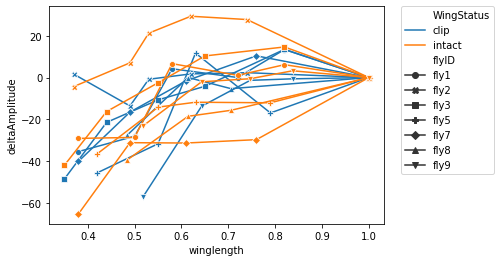

In [23]:
sns.lineplot(data = summary_df,
             x = 'winglength', y = 'deltaAmplitude', hue = 'WingStatus'
             , style = 'flyID'
             , markers=True 
            , dashes=False)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig('../dataFolder/Figure/AmplitudeAnalysis/v1/epi_ridge_cut_deltaWing.pdf',
           bbox_inches = 'tight')

In [10]:
Exp = 'haltere_loading'

data = GetMedianAmplitude(Exp)
data.to_csv('../dataFolder/AmplitudeAnalysis/v1/' + Exp + '/median_summary.csv')

In [29]:
subset1 = data.loc[(data.body == 'LW') ,:]
subset2 = data.loc[(data.body == 'RW') ,:]
subset = subset1.append(subset2).sort_values(by = 'flyID', axis = 0)
subset = subset.rename(columns = {'winglength' : 'treatment'})
subset.head()

,flyID,body,med_amplitude,treatment
1,fly1,LW,143.449808,intacthalteres
5,fly1,LW,113.960979,loadedhaltere1
9,fly1,LW,119.242538,loadedhaltere2
13,fly1,LW,116.770405,loadedhaltere3
17,fly1,LW,133.561206,removedload


In [30]:
summary_df = getdelAmplitudeEachWing_haltere(subset, 'treatment')

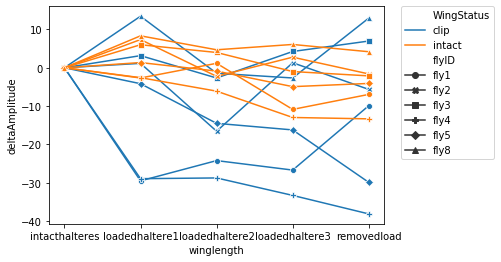

In [32]:
sns.lineplot(data = summary_df,
             x = 'winglength', y = 'deltaAmplitude', hue = 'WingStatus'
#               
             , style = 'flyID'
             , markers=True
            , dashes=False)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig('../dataFolder/Figure/AmplitudeAnalysis/v1/haltere_loading_deltaWing.pdf',
           bbox_inches = 'tight')

## Delta Amplitude between L-R wings

In [ ]:
Exp = 'asymmetric_wings'

data = GetMedianAmplitude(Exp)
data.head()

In [ ]:
# plot the delta L-R wing amplitude as a function of winglength
summary = getdelAmplitude(data, Exp, 'winglength')
sns.lineplot(data = summary,
             x = 'winglength', y = 'deltaAmplitude', hue = 'flyID'
             , style = 'flyID'
             , markers=True
            , dashes=False)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig('../dataFolder/Figure/AmplitudeAnalysis/v1/' + Exp + '_deltaL_R.pdf',
           bbox_inches = 'tight')

In [ ]:
Exp = 'Slit_sc'

data = GetMedianAmplitude(Exp)
data.head()

In [ ]:
# plot the delta L-R wing amplitude as a function of winglength
summary = getdelAmplitude(data, Exp, 'winglength')
sns.lineplot(data = summary,
             x = 'winglength', y = 'deltaAmplitude', hue = 'flyID'
             , style = 'flyID'
             , markers=True
            , dashes=False)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig('../dataFolder/Figure/AmplitudeAnalysis/v1/' + Exp + '_deltaL_R.pdf',
           bbox_inches = 'tight')

In [24]:
Exp = 'epi_ridge_cut'

data = GetMedianAmplitude(Exp)
data.head()

,flyID,body,med_amplitude,winglength
0,fly1,LH,123.092827,0.38
1,fly1,LW,67.457731,0.38
2,fly1,RH,123.358511,0.38
3,fly1,RW,107.727884,0.38
4,fly1,LH,145.689576,0.50


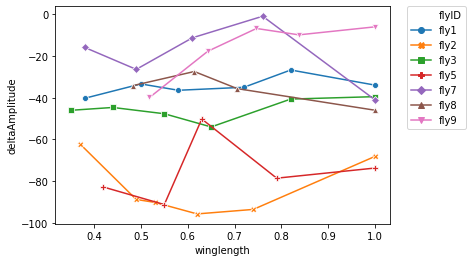

In [25]:
# plot the delta L-R wing amplitude as a function of winglength
summary = getdelAmplitude(data, Exp, 'winglength')
sns.lineplot(data = summary,
             x = 'winglength', y = 'deltaAmplitude', hue = 'flyID'
             , style = 'flyID'
             , markers=True
            , dashes=False)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig('../dataFolder/Figure/AmplitudeAnalysis/v1/' + Exp + '_deltaL_R.pdf',
           bbox_inches = 'tight')

In [26]:
Exp = 'haltere_loading'

data = GetMedianAmplitude(Exp)
data.head()

,flyID,body,med_amplitude,winglength
0,fly1,LH,149.877798,intacthalteres
1,fly1,LW,143.449808,intacthalteres
2,fly1,RH,144.618297,intacthalteres
3,fly1,RW,156.706477,intacthalteres
4,fly1,LH,144.068284,loadedhaltere1


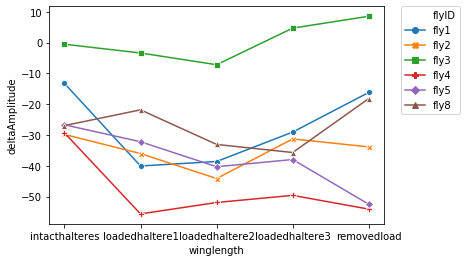

In [27]:
# plot the delta L-R wing amplitude as a function of winglength
summary = getdelAmplitude(data, Exp, 'winglength')
sns.lineplot(data = summary,
             x = 'winglength', y = 'deltaAmplitude', hue = 'flyID'
             , style = 'flyID'
             , markers=True
            , dashes=False)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig('../dataFolder/Figure/AmplitudeAnalysis/v1/' + Exp + '_deltaL_R.pdf',
           bbox_inches = 'tight')